# Building Agents That Use Code

This notebook is part of the [Hugging Face Agents Course](https://www.hf.co/learn/agents-course), a free Course from beginner to expert, where you learn to build Agents.

![Agents course share](https://huggingface.co/datasets/agents-course/course-images/resolve/main/en/communication/share.png)

## Let's install the dependencies and login to our HF account to access the Inference API

If you haven't installed `smolagents` yet, you can do so by running the following command:

In [1]:
!pip install smolagents

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 813.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


Let's also login to the Hugging Face Hub to have access to the Inference API.

In [2]:
from huggingface_hub import notebook_login

notebook_login()

## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [3]:
from smolagents import CodeAgent, HfApiModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=HfApiModel())

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 0: Duration 6.54 seconds| Input tokens: 2,077 | Output tokens: 76]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 1: Duration 4.64 seconds| Input tokens: 4,335 | Output tokens: 159]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  final_answer(highest_rated_catering_service)                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Catering Co.

[Step 2: Duration 4.58 seconds| Input tokens: 6,781 | Output tokens: 237]

Gotham Catering Co.


## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [4]:
from smolagents import Tool, CodeAgent, HfApiModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=HfApiModel())

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  villain_theme = superhero_party_theme_generator(category="villain masquerade")                                   
  print(f"The suggested theme for a 'villain masquerade' is: {villain_theme}")                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
The suggested theme for a 'villain masquerade' is: Gotham Rogues' Ball: A mysterious masquerade where guests dress 
as classic Batman villains.

Out: None

[Step 0: Duration 4.16 seconds| Input tokens: 2,113 | Output tokens: 84]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains")       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains

[Step 1: Duration 3.68 seconds| Input tokens: 4,452 | Output tokens: 164]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains


## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [5]:
party_theme_tool.push_to_hub("vadhri/catering_service_tool", token="<YOUR_HUGGINGFACEHUB_API_TOKEN>")

README.md:   0%|          | 0.00/240 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/vadhri/catering_service_tool/commit/342d715d3b1c7dbd08fb154966a3d2496f966528', commit_message='Upload tool', commit_description='', oid='342d715d3b1c7dbd08fb154966a3d2496f966528', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/vadhri/catering_service_tool', endpoint='https://huggingface.co', repo_type='space', repo_id='vadhri/catering_service_tool'), pr_revision=None, pr_num=None)

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

tool.py:   0%|          | 0.00/635 [00:00<?, ?B/s]

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "high-res, photorealistic, luxurious superhero-themed party at Wayne Manor with made-up superheros.     
  The party is upscale with chandeliers, elegant furniture, and sophisticated decorations. The made-up superheros  
  have unique and imaginative powers, designs, and costumes. The partygoers are enjoying themselves, with subtle   
  Batman references throughout the venue."                                                                         
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7889C215CE50>

[Step 0: Duration 10.67 seconds| Input tokens: 2,107 | Output tokens: 143]

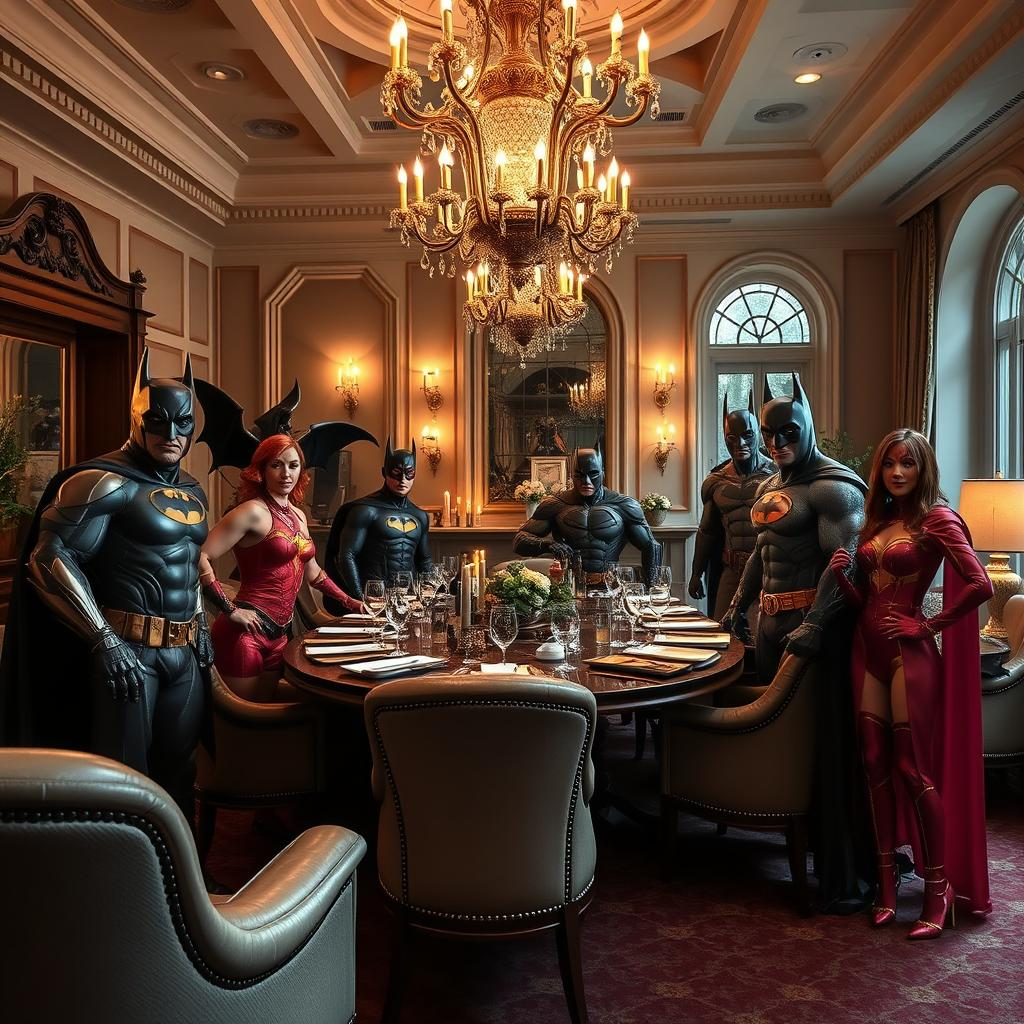

In [6]:
from smolagents import load_tool, CodeAgent, HfApiModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=HfApiModel()
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [7]:
!pip install gradio_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 4.8 MB/s eta 0:00:00


In [8]:
from smolagents import CodeAgent, HfApiModel, Tool

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

model = HfApiModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Improving the prompt                                                                                           
  improved_prompt = ("A grand superhero-themed party at Wayne Manor, filled with vibrant costumes and iconic       
  superhero symbols. Alfred Pennyworth oversees a luxurious, candle-lit gala, with elegant decor, gourmet food,    
  and exciting activities for both guests and superheroes.")                                                       
                                                                                                                   
  # Print the improved prompt for observation                                                                      
  print("Improved Prompt:", improved_prompt)                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Improved Prompt: A grand superhero-themed party at Wayne Manor, filled with vibrant costumes and iconic superhero 
symbols. Alfred Pennyworth oversees a luxurious, candle-lit gala, with elegant decor, gourmet food, and exciting 
activities for both guests and superheroes.

Out: None

[Step 0: Duration 7.29 seconds| Input tokens: 2,104 | Output tokens: 118]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Generating the image using the improved prompt                                                                 
  image = image_generator(prompt=improved_prompt)                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: /tmp/gradio/57cb300bef642506113e9ce5ee3fca7ce482d9bf7a8e35522bb4520aced80860/image.webp

[Step 1: Duration 9.28 seconds| Input tokens: 4,515 | Output tokens: 178]

'/tmp/gradio/57cb300bef642506113e9ce5ee3fca7ce482d9bf7a8e35522bb4520aced80860/image.webp'

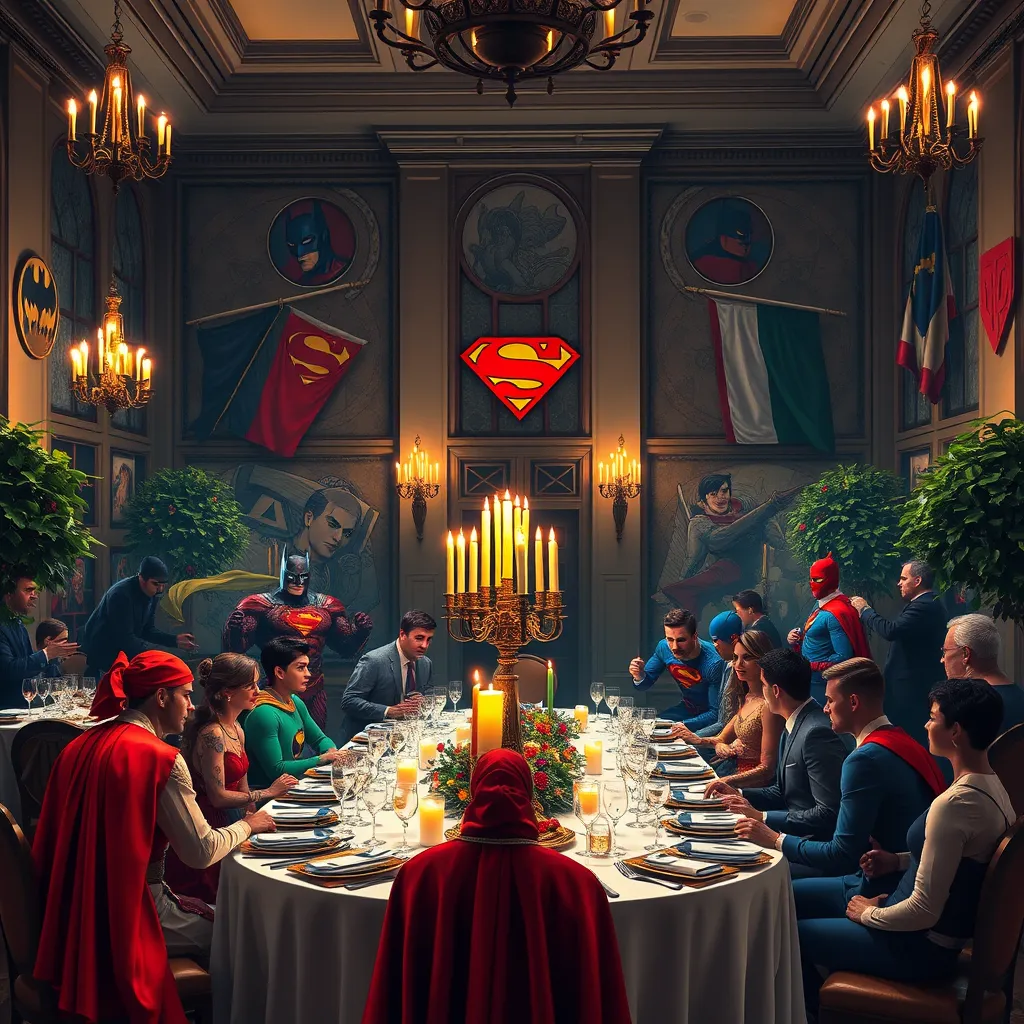

In [9]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = '/tmp/gradio/57cb300bef642506113e9ce5ee3fca7ce482d9bf7a8e35522bb4520aced80860/image.webp'

img = PILImage.open(image_path)
img

## Importing a LangChain Tool

These tools need a [SerpApi API Key](https://serpapi.com/).

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [10]:
!pip install langchain-community google-search-results

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32009 sha256=c6b00b0bdffdf039efd7ddf82f1eb91b095a28c228788f6e4ca1ea343312b48c
  Stored in directory: /root/.cache/pip/wheels/6e/42/3e/aeb691b02cb7175ec70e2da04b5658d4739d2b41e5f73cd06f
Successfully built google-search-results


In [11]:
from google.colab import userdata
import os
os.environ["SERPAPI_API_KEY"] = userdata.get('SERPAPI_API_KEY')

In [12]:
from langchain.agents import load_tools
from smolagents import CodeAgent, HfApiModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences.                                                                                                    │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_ideas = search(tool_input="luxury entertainment ideas for superhero-themed event live       
  performances and interactive experiences")                                                                       
  print(luxury_entertainment_ideas)                                                                                
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[' entity_type: related_questions.', 'Ready to explore some of the most in-demand superhero party ideas? Below you 
can find a few of the most popular characters for heroes and villains parties.', '✔️ Interactive performances that 
engage and entertain. ✔️ Professional cosplayers for a realistic experience. ✔️ Perfect for family days, corporate 
...', "Here's a look at different ideas for adding cartoon-like visuals and references to caped crusaders at your 
next affair.", 'Interactive Entertainment. Engage in action-packed activities, thrilling photo ops, and dynamic 
performances that bring superhero stories to life. Versatile ...', '... luxury entertainment ideas for a 
superhero-themed event, such as live performances and interactive experiences.") With this setup, Alfred can 
quickly ...', 'Dec 16, 2013 - Explore Tablescapes By Design\'s board "SUPER HERO THEMED EVENTS" on Pinterest. See 
more ideas about superhero birthday, superhero birthday ...', 'Discover celebrity-inspired party themes: From red 
carpet glam to fairytale fantasies, elevate your celebrations with glamour and creativity!', 'This tool suggests 
creative superhero-themed party ideas based on a category. It returns a unique party theme idea.""" inputs = {', 
'Explore 29 conference entertainment ideas to boost engagement, build connections, and create memorable 
experiences.', 'Elevate your next office event with the best corporate party ideas! Find unique themes, 
entertaining activities, and team-building must-dos.']

Out: None

[Step 0: Duration 7.84 seconds| Input tokens: 2,082 | Output tokens: 82]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_ideas = search(tool_input="luxury high-end entertainment ideas for superhero-themed events  
  live performances and interactive experiences")                                                                  
  print(luxury_entertainment_ideas)                                                                                
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[' entity_type: related_questions.', "Here's a complete guide to event theme ideas, their importance, and how 
integrating them with event technology can enhance your event!", "We've compiled a list of 75 cool post-Covid event
themes, where we're sure you will find the most epic theme for your next party.", '✔️ Interactive performances that
engage and entertain. ✔️ Professional cosplayers for a realistic experience. ✔️ Perfect for family days, corporate 
...', 'Engage in action-packed activities, thrilling photo ops, and dynamic performances that bring superhero 
stories to life. Versatile Appearances. Perfect for ...', 'Explore 29 conference entertainment ideas to boost 
engagement, build connections, and create memorable experiences.', 'Aug 29, 2019 - Superhero entertainment to hire 
worldwide. See more ideas about superhero, corporate events, batman.', 'Choose the Perfect Theme for Your Events. 
Transform an ordinary gathering into an extraordinary experience with these event theme ideas. From ...', 'With 
themes like Venetian masquerades or superhero nights, these corporate party theme ideas encourage employees to 
express themselves through costumes and have ...', 'Innovative activities that complement event themes include 
interactive workshops, themed photo booths, live performances, and immersive experiences such as ...', 'Discover 
top customer and client appreciation event ideas to boost loyalty and create unforgettable experiences and events 
for your ...']

Out: None

[Step 1: Duration 13.85 seconds| Input tokens: 4,640 | Output tokens: 170]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_ideas = search(tool_input="luxury and high-end superhero-themed live performances and       
  interactive experiences")                                                                                        
  print(luxury_entertainment_ideas)                                                                                
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['Why Choose Our Superhero-Themed Events? ✔️ Interactive performances that engage and entertain. ✔️ Professional 
cosplayers for a realistic ...', 'Become a part of THE experience. You will smash villains as Hulk, fly as Iron 
Man, shoot energy beams with Vision, and scale buildings with Spidey!', 'Six Flags Fiesta Texas will open the 
largest DC Universe themed area in any US amusement park on March 1, featuring new rides and updated ...', 'Visit 
the ultimate MARVEL 4D experince! Meet the iconic heroes only at Madame Tussauds Hollywood! Step right into 
action-packed fun in Los Angeles.', 'Some replicas of movie costumes and plastic statues of iron man suits, some 
flashy lights, some hokey "interactive" (barely) displays. The travelling Marvel: ...', "Entertainment located in 
Avengers Campus at Disney California Adventure Park. Encounter some of Earth's Mightiest Heroes and watch them 
spring into action.", 'The Marvel Experience takes the theme park model and elevates it to new levels with amazing 
multimedia technology and an opportunity for fans to participate ...', 'A fully immersive design with life-size 
scenes straight from the comic world. Rare, hand-drawn images of iconic heroes such as Spider-Man, Black Panther, 
...', "Take a stand alongside some of Marvel's mightiest heroes and villains during an action-packed, day-long 
extravaganza on select 5-night Western Caribbean and ...", '... luxury entertainment ideas for a superhero-themed 
event, such as live performances and interactive experiences.") With this setup, Alfred can quickly ...']

Out: None

[Step 2: Duration 7.58 seconds| Input tokens: 7,673 | Output tokens: 249]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_ideas = [                                                                                   
      "Interactive performances that engage and entertain, with professional cosplayers or FX performers for a     
  realistic experience.",                                                                                          
      "Avengers Campus at Disney California Adventure Park (Encounter Marvel heroes and watch dynamic              
  performances).",                                                                                                 
      "The MARVEL Experience (Multimedia technology with guest participation).",                                   
      "Six Flags DC Universe Theme Area (Largest DC Universe-themed area with new rides and attractions).",        
      "Madame Tussauds Hollywood (Meet Marvel heroes in a theme park setting).",                                   
      "Immersive designs with life-size comic scenes, hand-drawn images, and interactive displays.",               
      "Action-packed day-long extravaganza with Marvel heroes and villains at select cruises."                     
  ]                                                                                                                
                                                                                                                   
  final_answer(luxury_entertainment_ideas)                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: ['Interactive performances that engage and entertain, with professional cosplayers or FX 
performers for a realistic experience.', 'Avengers Campus at Disney California Adventure Park (Encounter Marvel 
heroes and watch dynamic performances).', 'The MARVEL Experience (Multimedia technology with guest 
participation).', 'Six Flags DC Universe Theme Area (Largest DC Universe-themed area with new rides and 
attractions).', 'Madame Tussauds Hollywood (Meet Marvel heroes in a theme park setting).', 'Immersive designs with 
life-size comic scenes, hand-drawn images, and interactive displays.', 'Action-packed day-long extravaganza with 
Marvel heroes and villains at select cruises.']

[Step 3: Duration 31.32 seconds| Input tokens: 11,202 | Output tokens: 665]

['Interactive performances that engage and entertain, with professional cosplayers or FX performers for a realistic experience.',
 'Avengers Campus at Disney California Adventure Park (Encounter Marvel heroes and watch dynamic performances).',
 'The MARVEL Experience (Multimedia technology with guest participation).',
 'Six Flags DC Universe Theme Area (Largest DC Universe-themed area with new rides and attractions).',
 'Madame Tussauds Hollywood (Meet Marvel heroes in a theme park setting).',
 'Immersive designs with life-size comic scenes, hand-drawn images, and interactive displays.',
 'Action-packed day-long extravaganza with Marvel heroes and villains at select cruises.']

With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉